## 1.	Introducción
En esencia, la visualización de datos es el arte de convertir datos crudos en representaciones visuales comprensibles. Imagine tener un conjunto de datos que describa las ventas mensuales de una empresa durante varios años. Poder transmitir la trayectoria de estas ventas y resaltar tendencias clave a través de gráficos hace que la información sea mucho más accesible y memorable que una tabla llena de números. La visualización no solo ilustra datos, sino que también revela patrones sutiles, discrepancias notables y relaciones ocultas que son difíciles de discernir en su forma tabular original. a medida que avancemos en este curso, no solo aprenderemos a generar visualizaciones impactantes con Matplotlib y Plotly, sino también a utilizar estas herramientas como un medio para contar historias con datos.

### 1.1.	Objetivos
>- Dominar la Creación de Gráficos Básicos con Matplotlib.
>- Dominar la Creación de Gráficos Básicos con Ploty.
>- Crear Composiciones Gráficas en una Misma Imagen.
>- Exportación de Gráficos a Diferentes Formatos. 


## 2.	Matplotlib
Matplotlib es una de las bibliotecas de visualización de datos más populares en el lenguaje de programación Python. Proporciona una amplia gama de herramientas para crear gráficos estáticos, interactivos y de alta calidad. Matplotlib ofrece una interfaz flexible para construir diversos tipos de gráficos, como gráficos de línea, gráficos de dispersión, gráficos de barras, gráficos de torta, histogramas, diagramas de caja y más.

La estructura básica de un gráfico en Matplotlib consiste en figuras (figuras) y ejes (subplots). Una figura puede contener uno o más ejes, y cada eje representa un área dentro de la figura donde se dibujará el gráfico. Esta estructura jerárquica permite una personalización detallada y la creación de gráficos complejos con múltiples subplots.
- **Figuras (Figures):** Una figura en Matplotlib es el lienzo principal sobre el cual se crean los gráficos. Puedes pensar en la figura como el contenedor de todos los elementos gráficos. Puedes crear una figura usando la función plt.figure() de Matplotlib. Una figura puede contener uno o más ejes.
- **Ejes (Subplots):** Los ejes son las áreas individuales donde realmente se dibujarán los gráficos. Puedes tener múltiples ejes en una figura, lo que te permite crear subplots y colocar varios gráficos en una misma figura. Los ejes se crean utilizando la función fig.add_subplot() o mediante la función plt.subplots(), que puede crear una matriz de ejes en una figura.
- **Gráficos:** Una vez que tienes tus ejes (subplots), puedes dibujar diferentes tipos de gráficos en ellos, como líneas, barras, dispersión, histogramas, etc. Puedes usar funciones como ax.plot(), ax.bar(), ax.scatter(), entre otras, para generar los gráficos en los ejes.
- **Personalización:** La estructura jerárquica de figuras y ejes en Matplotlib te brinda un gran control sobre la apariencia y personalización de tus gráficos. Puedes personalizar cada figura y cada eje individualmente, ajustar los colores, los tamaños, las etiquetas de los ejes, los títulos y mucho más.
- **Múltiples Subplots:** Una de las ventajas clave de Matplotlib es su capacidad para crear múltiples subplots en una figura. Puedes organizar subplots en filas y columnas, lo que es útil para comparar varios gráficos o visualizar diferentes aspectos de los datos en una misma figura.


### 2.1.	Instalación de Matplotlib
>Para instalar Matplotlib, una popular biblioteca de visualización de datos en Python, puedes utilizar el gestor de paquetes pip o conda.

<center>

|entorno|comando|obs|
|--|---|---|
|pip|pip install matplotlib||
|conda|conda install matplotlib|si estás utilizando el entorno de Anaconda|

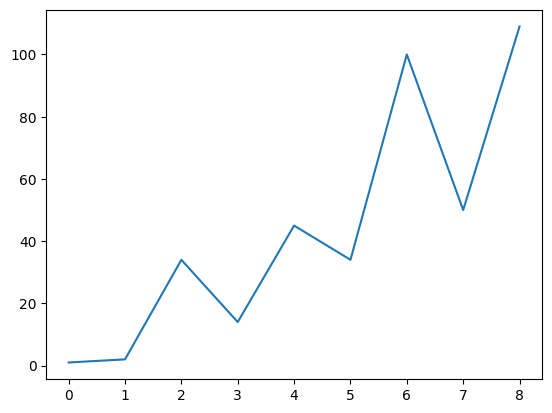

In [32]:
import matplotlib.pyplot as plt
plt.plot([1,2,34,14,45,34,100, 50,109])

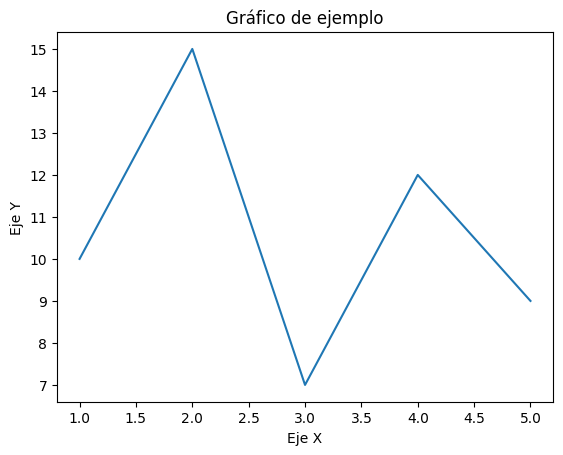

In [38]:
x = [1, 2, 3, 4, 5]
y = [10, 15, 7, 12, 9]

plt.plot(x, y)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de ejemplo')
plt.show()



### 2.2.	Creación de gráficos
>A continuación, usaremos el conjunto de datos de registro clínico de insuficiencia cardiaca, el cual contiene datos de pacientes recopilados durante el periodo de seguimiento, han sido tomados del repositorio de la UCI; el cual fue donado en 2020 bajo la atribution 4.0 International.


In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el conjunto de datos
patient_record = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [11]:
#Cambiar el tipo de datos a categórico según la descripción de los datos
patient_record[["anaemia"]] = patient_record[["anaemia"]].astype("object")
patient_record[["diabetes"]] = patient_record[["diabetes"]].astype("object")
patient_record[["high_blood_pressure"]] = patient_record[["high_blood_pressure"]].astype("object")
patient_record[["sex"]] = patient_record[["sex"]].astype("object")
patient_record[["smoking"]] = patient_record[["smoking"]].astype("object")
patient_record[["DEATH_EVENT"]] = patient_record[["DEATH_EVENT"]].astype("object")

print(f'='*42 +' ALTERED DATA DATA TYPES '+ '='*45) # 0:False, 1:True
print(patient_record.dtypes)

========================================== ALTERED DATA DATA TYPES =============================================
age                         float64
anaemia                      object
creatinine_phosphokinase      int64
diabetes                     object
ejection_fraction             int64
high_blood_pressure          object
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                          object
smoking                      object
time                          int64
DEATH_EVENT                  object
dtype: object


In [12]:
# Definir los grupos de edad y las etiquetas
bins = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
labels = ['40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94']
age_bins = pd.cut(patient_record['age'], bins=bins, labels=labels)

# Aplicar el mapeo a las columnas relevantes
patient_record['age-binned']=pd.cut(patient_record['age'], bins=bins, labels=labels)

**A.	Gráficos de línea:**
>Los gráficos de líneas son utilizados para mostrar la relación y tendencia entre dos conjuntos de datos continuos a lo largo de un eje. En este tipo de gráfico, los puntos de datos se conectan mediante líneas rectas, lo que permite identificar patrones, fluctuaciones y cambios a lo largo del tiempo o en una secuencia determinada.
>- **Evolución Temporal:** Los gráficos de líneas son ideales para representar la evolución de variables a lo largo del tiempo, como el crecimiento de ingresos anuales de una empresa, el cambio en las temperaturas estacionales, etc.
>- **Seguimiento de Tendencias:** Pueden utilizarse para rastrear tendencias en datos financieros, como precios de acciones, tasas de interés o fluctuaciones económicas.
>- **Comparación de Múltiples Series:** Si tienes varias series de datos relacionadas, un gráfico 

<Figure size 1000x600 with 0 Axes>

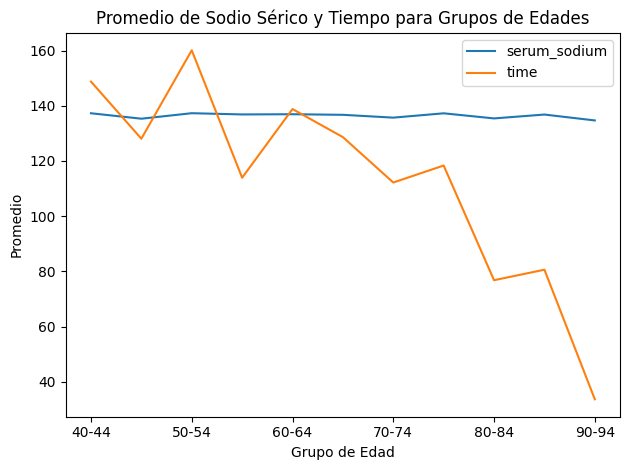

In [4]:
# Crear gráfico de líneas (edad vs. serum_creatinine)
average_data = patient_record[['serum_sodium','time','age-binned']].groupby('age-binned').mean()

plt.figure(figsize=(10, 6))
average_data.plot()
plt.title('Promedio de Sodio Sérico y Tiempo para Grupos de Edades')
plt.xlabel('Grupo de Edad')
plt.ylabel('Promedio')
plt.xticks(rotation=0)
plt.tight_layout()

**B.	Gráficos de dispersión:**
>Los gráficos de dispersión utilizan puntos individuales para representar pares de valores en un conjunto de datos. Son útiles para entender la relación entre dos variables y visualizar la dispersión o concentración de los datos.
>- **Correlación:** Los gráficos de dispersión son esenciales para identificar la relación entre dos variables. Puedes evaluar si hay una correlación positiva, negativa o nula entre ellas.
>- **Outliers:** Ayudan a identificar valores atípicos (outliers) en un conjunto de datos, que pueden afectar significativamente a análisis posteriores.
>- **Visualización de Distribuciones:** Permiten visualizar la distribución de puntos en un espacio bidimensional, lo que es útil para comprender la concentración de datos.


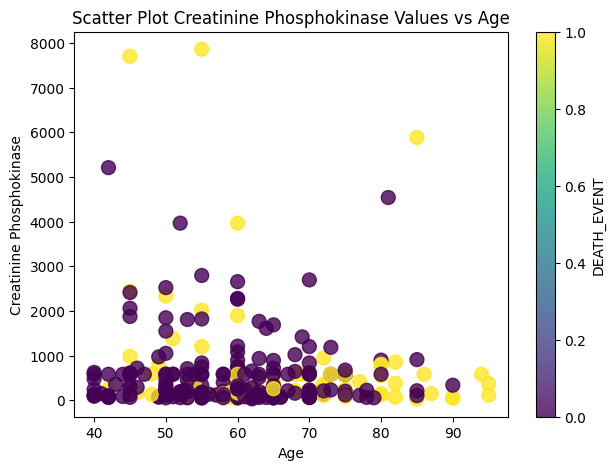

In [5]:
# Scatter Plot Creatinine Phosphokinase Values vs Age
plt.figure(figsize = (7, 5))
plt.title('Scatter Plot Creatinine Phosphokinase Values vs Age')
plt.scatter(patient_record['age']
                , patient_record['creatinine_phosphokinase']
                , c = patient_record['DEATH_EVENT']
                , alpha=0.8
                , s = 100
                )
plt.xlabel('Age')
plt.ylabel('Creatinine Phosphokinase')
plt.colorbar(label = 'DEATH_EVENT')
plt.show()

**C.	Gráficos de barras:**
>Los gráficos de barras representan datos discretos utilizando barras rectangulares de longitud proporcional al valor que representan. Son eficaces para comparar diferentes categorías o grupos en función de una variable.
>- **Comparación Categórica:** Son ideales para comparar cantidades entre diferentes categorías, como ventas por producto, población por región, etc.
>- **Distribuciones de Datos:** Pueden mostrar la distribución de datos en diferentes rangos, como el recuento de personas en diferentes grupos de edad.
>- **Análisis de Resultados:** Se utilizan para representar resultados de encuestas o estudios, mostrando la frecuencia de respuestas en diferentes opciones.


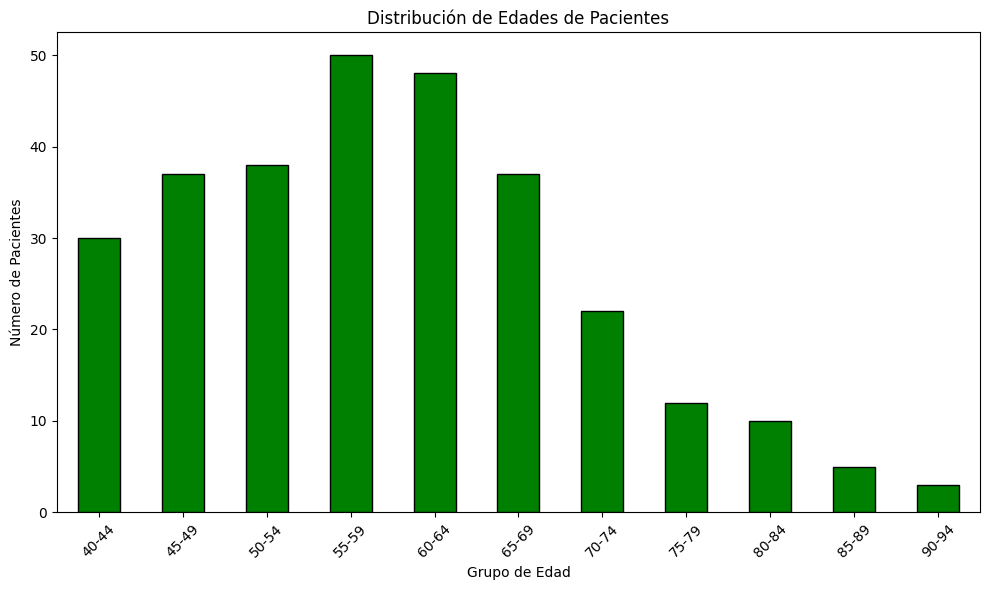

In [4]:
# Crear un gráfico de densidad
plt.figure(figsize=(10, 6))
age_bins.value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribución de Edades de Pacientes')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3.	Plotly
Plotly es una biblioteca de visualización de datos en Python que permite crear gráficos interactivos y atractivos de manera sencilla. A diferencia de las bibliotecas de visualización tradicionales, Plotly ofrece la capacidad de explorar y analizar datos de manera más dinámica a través de elementos interactivos, como zoom, desplazamiento y más. 
Crear gráficos en Plotly implica seguir una estructura básica que consiste en tres elementos clave: los datos (data), la disposición (layout) y la figura (Figure).
- **Datos (Data):** El componente de datos contiene la información que deseas visualizar en el gráfico. Puedes especificar los datos y sus propiedades como el tipo de gráfico, colores, etiquetas, etc. Los datos se representan en forma de lista de diccionarios, donde cada diccionario representa una serie de datos.
- **Disposición (Layout):** La disposición define la apariencia y el diseño del gráfico, como los títulos de los ejes, los títulos del gráfico, los márgenes y más. Es un diccionario que incluye propiedades como 'title', 'xaxis', 'yaxis', 'margin', etc.
- **Figura (Figure):** La figura combina los datos y la disposición en un objeto que representa el gráfico completo. Se crea utilizando la función go.Figure() de la biblioteca plotly.graph_objects. La figura es la que finalmente se visualiza o exporta.


### 2.1.	Instalación de Plotly
>Plotly es una biblioteca de visualización de datos interactiva en Python. Puedes instalarla fácilmente utilizando herramientas como pip, que es el gestor de paquetes de Python.

<center>

|entorno|comando|obs|
|--|---|---|
|pip|pip install plotly||
|conda|conda install plotly|si estás utilizando el entorno de Anaconda|

In [8]:
import plotly.graph_objects as go

# Datos
data = [
    go.Scatter(x=[1, 2, 3], y=[4, 3, 8], mode='lines', name='Línea 1'),
    go.Bar(x=[1, 2, 3], y=[10, 15, 7], name='Barra 1')
]

# Disposición
layout = go.Layout(title='Ejemplo de Gráfico Plotly', xaxis_title='Eje X', yaxis_title='Eje Y')

# Crear figura
fig = go.Figure(data=data, layout=layout)

# Mostrar figura
fig.show()



### 3.2.	Creación de Graficos 
**A.	Gráficos de línea:**
>- **Interactividad:** Los gráficos de líneas en Plotly son interactivos. Puedes hacer zoom en áreas específicas, resaltar datos al pasar el cursor, y seleccionar series individuales para resaltar o desactivar.
•>- **Personalización:** Plotly te permite personalizar cada aspecto del gráfico, como colores, estilos de línea, etiquetas de ejes y títulos. Puedes adaptar el gráfico para que se ajuste perfectamente a tus necesidades.
>- **Múltiples Series:** Crear gráficos de líneas con varias series es fácil en Plotly. Puedes comparar tendencias y patrones en diferentes categorías de datos en un solo gráfico.


In [13]:
import plotly.express as px
# Calcular el promedio de serum_sodium y time para cada grupo de edades
average_data = patient_record.groupby('age-binned')[['serum_sodium', 'time']].mean().reset_index()

# Crear el gráfico interactivo de líneas
fig = px.line(average_data, x='age-binned', y=['serum_sodium', 'time'],
              title='Promedio de Sodio Sérico y Tiempo para Grupos de Edades',
              labels={'age-binned': 'Grupo de Edad', 'value': 'Promedio'},
              template='plotly')

# Mostrar el gráfico interactivo
fig.show()


**B.	Gráficos de dispersión:**
>- **Interacción de Puntos:** Plotly permite interactuar con los puntos individuales en un gráfico de dispersión. Al pasar el cursor sobre un punto, se muestra información detallada.
>- **Visualización Multidimensional:** Puedes utilizar colores, tamaños y formas para representar otra dimensión de datos, lo que facilita la interpretación de relaciones complejas.
>- **Regresiones y Líneas de Tendencia:** Plotly te permite agregar regresiones y líneas de tendencia a un gráfico de dispersión, ayudando a visualizar patrones generales en los datos.


In [15]:
# Crear el Scatter Plot interactivo
fig = px.scatter(patient_record, x='age', y='creatinine_phosphokinase', color='DEATH_EVENT',
                 title='Scatter Plot Creatinine Phosphokinase Values vs Age',
                 labels={'age': 'Age', 'creatinine_phosphokinase': 'Creatinine Phosphokinase'},
                 opacity=0.8, size_max=100,
                 template='plotly')

# Agregar etiqueta a la barra de color
fig.update_traces(marker=dict(size=12),
                  selector=dict(mode='markers'))

# Mostrar el Scatter Plot interactivo
fig.show()


**C.	Gráficos de barras:**
>- **Agrupados o Apilados:** Plotly ofrece la posibilidad de crear gráficos de barras agrupados o apilados. Esto permite comparar datos entre categorías y subcategorías de manera eficiente.
>- **Personalización Detallada:** Desde la personalización de colores y etiquetas hasta el ancho de las barras, puedes ajustar cada aspecto del gráfico de barras según tus necesidades específicas.
>- **Anotaciones y Etiquetas:** Puedes agregar anotaciones a las barras para resaltar valores específicos o proporcionar información adicional. Las etiquetas también pueden ayudar a comprender los datos de manera rápida.


In [17]:
# Crear un histograma apilado de la distribución de edades
fig = px.histogram(patient_record, x='age', color='age-binned',
                   title='Distribución de Edades de Pacientes',
                   labels={'age': 'Edad', 'age-binned': 'Grupo de Edad'},
                   template='plotly')

# Mostrar el histograma apilado
fig.show()

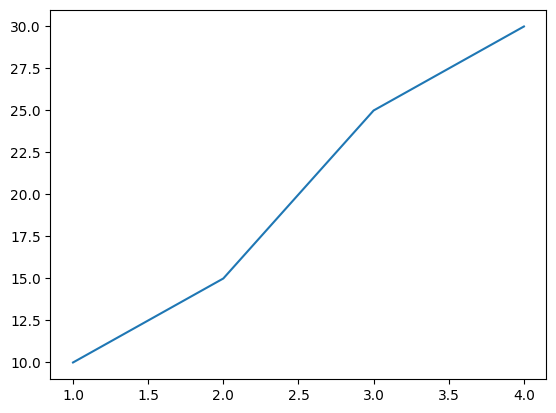

In [18]:
import matplotlib.pyplot as plt

# Crear un gráfico (por ejemplo, un gráfico de líneas)
plt.plot([1, 2, 3, 4], [10, 15, 25, 30])

# Guardar el gráfico en un archivo PNG
plt.savefig('grafico_matplotlib.png')

# Mostrar el gráfico en la ventana
plt.show()


In [27]:
import plotly.express as px
# Calcular el promedio de serum_sodium y time para cada grupo de edades
average_data = patient_record.groupby('age-binned')[['serum_sodium', 'time']].mean().reset_index()

# Crear el gráfico interactivo de líneas
fig = px.line(average_data, x='age-binned', y=['serum_sodium', 'time'],
              title='Promedio de Sodio Sérico y Tiempo para Grupos de Edades',
              labels={'age-binned': 'Grupo de Edad', 'value': 'Promedio'},
              template='plotly')



# Mostrar el gráfico interactivo
fig.show()

import plotly.graph_objects as go
# Exportar el gráfico a un archivo HTML
go.Figure(fig).write_html("nombre_del_archivo.html")